In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# Readig Data
data = pd.read_csv("C:\\Benion\\Benion Programmings\\Python\\AI & ML\\data\\benion-tree-hd-dataset-new.csv")
data.shape

(590, 5)

In [3]:
data.head(10)

,PLOT NO,S/N,SPECIES,DIAMETER,HEIGHT
0,P1,1,Tectona grandis,28.6,13.7
1,P1,2,Gmelina arborea,34.7,16.3
2,P1,3,Senna siamea,46.1,18.5
3,P1,4,Senna siamea,22.0,9.3
4,P1,5,Senna siamea,25.8,11.0
5,P1,6,Senna siamea,24.5,10.5
6,P1,7,Gmelina arborea,50.9,18.9
7,P1,8,Senna siamea,25.1,11.0
8,P1,9,Senna siamea,22.9,10.4
9,P1,10,Senna siamea,27.1,13.0


In [5]:
# Declaring Dependent and Independent Variables
X = data["HEIGHT"].values.reshape(-1, 1)
y = data["DIAMETER"].values.reshape(-1, 1)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Implement the Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Implement the Support Vector Machine --> Support Vector Regressor and fit the data
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train, y_train)

# Make Prediction
lr_predictions = lr_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

C:\Users\benion\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
data_frame = pd.DataFrame({"Actual(y)": y_test.flatten(), "LR-Predicted(y)": lr_predictions.flatten(), "SVR-Predicted(y)": svr_predictions.flatten()})
data_frame

,Actual(y),LR-Predicted(y),SVR-Predicted(y)
0,17.2,15.885148,17.099875
1,22.3,20.902119,20.553526
2,18.3,15.590032,16.807065
3,24.2,23.263047,21.840466
4,18.5,16.475380,17.688666
...,...,...,...
113,18.8,17.213170,18.387400
114,26.4,25.033743,23.326186
115,36.6,33.592105,34.303245
116,32.0,32.116525,32.200518


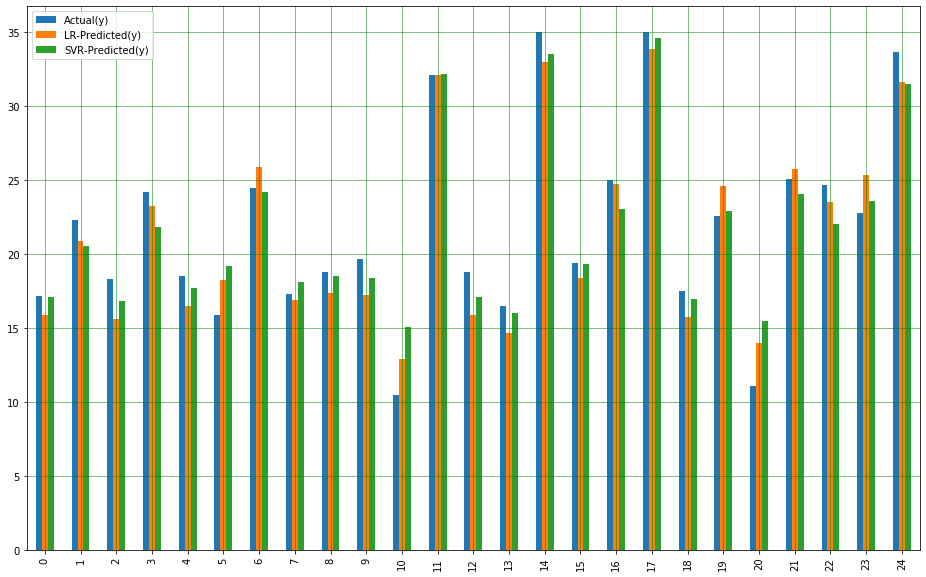

In [7]:
# Bar Graph
data_frame = pd.DataFrame({"Actual(y)": y_test.flatten(), "LR-Predicted(y)": lr_predictions.flatten(), "SVR-Predicted(y)": svr_predictions.flatten()})
data_frame_graph = data_frame.head(25)
data_frame_graph.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="red")
plt.show()

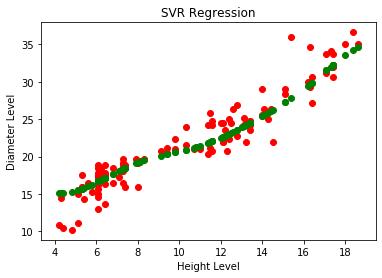

In [8]:
# SVR Plot
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test.reshape(-1), color="red")
plt.scatter(X_test, svr_predictions, color="green")
plt.title("SVR Regression")
plt.xlabel("Height Level")
plt.ylabel("Diameter Level")
plt.show()

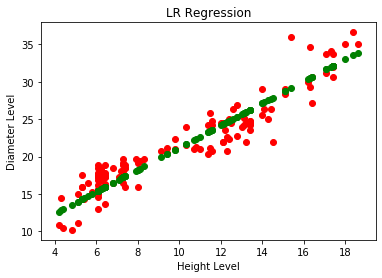

In [9]:
# LR Plot
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test.reshape(-1), color="red")
plt.scatter(X_test, lr_predictions, color="green")
plt.title("LR Regression")
plt.xlabel("Height Level")
plt.ylabel("Diameter Level")
plt.show()

In [10]:
# SVR
svr_mean_absolute_error = mean_absolute_error(y_test, svr_predictions)
svr_mean_squared_error = mean_squared_error(y_test, svr_predictions)
svr_root_mean_squared_error = np.sqrt(svr_mean_squared_error)
svr_r2_score = svr_model.score(X_train, y_train)
print(f"Mean Absolute Error: {svr_mean_absolute_error}")
print(f"Mean Squared Error: {svr_mean_squared_error}")
print(f"Root Mean Squared Error: {svr_root_mean_squared_error}")
print(f"r^2 Score: {svr_r2_score} -- ({svr_r2_score * 100})%")

Mean Absolute Error: 1.325065148893127
Mean Squared Error: 3.622627607299137
Root Mean Squared Error: 1.903320153652332
r^2 Score: 0.8508264418663652 -- (85.08264418663653)%


In [11]:
# LR
lr_mean_absolute_error = mean_absolute_error(y_test, lr_predictions)
lr_mean_squared_error = mean_squared_error(y_test, lr_predictions)
lr_root_mean_squared_error = np.sqrt(lr_mean_squared_error)
lr_r2_score = lr_model.score(X_train, y_train)
print(f"Mean Absolute Error: {lr_mean_absolute_error}")
print(f"Mean Squared Error: {lr_mean_squared_error}")
print(f"Root Mean Squared Error: {lr_root_mean_squared_error}")
print(f"r^2 Score: {lr_r2_score} -- ({lr_r2_score * 100})%")

Mean Absolute Error: 1.6230760951912375
Mean Squared Error: 3.9128995101944106
Root Mean Squared Error: 1.9781050301221144
r^2 Score: 0.8271449326302354 -- (82.71449326302354)%
